<a href="https://colab.research.google.com/github/shekhs/Covid19-prediction/blob/main/Predicting_Covid19_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  PROBLEM STATEMENT
We have about 10 months worth of data available about tests,cases and deaths due to covid19.
We are forecasting the trend for next month and next couple of months.
We are using facebook research's prophet library.

# IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [3]:
# Import the data

df = pd.read_csv("covid_data.csv")
df.head()

#Data Dictionary:
# Entity: Country Name
# Date: Date on which records were observed
# Cases: Number of confirmed Covid-19 cases
# Deaths: Number of confirmed Covid-19 related deaths
# Daily tests: Number of tests taken in the country
# Iso_alpha: ISO code for countries
# Month: Month of observation


,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1,Mexico,2020-01-02,0.0,0.0,72.0,MEX,1
2,Mexico,2020-01-03,0.0,0.0,89.0,MEX,1
3,Thailand,2020-01-04,0.0,0.0,2.0,THA,1
4,Mexico,2020-01-04,0.0,0.0,45.0,MEX,1


# LETS PERFORM EXPLORATORY DATA ANALYSIS

In [8]:
# Checking null values
df.isnull().sum()

Entity         0
Date           0
Cases          0
Deaths         0
Daily tests    0
iso_alpha      0
month          0
dtype: int64

In [10]:
# Getting dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       20645 non-null  object 
 1   Date         20645 non-null  object 
 2   Cases        20645 non-null  float64
 3   Deaths       20645 non-null  float64
 4   Daily tests  20645 non-null  float64
 5   iso_alpha    20645 non-null  object 
 6   month        20645 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [11]:
# Statistical data of the dataframe
df.describe()

,Cases,Deaths,Daily tests,month
count,2.064500e+04,20645.000000,2.064500e+04,20645.000000
mean,1.247184e+05,4693.475902,2.248130e+04,6.401259
std,6.068402e+05,17873.361923,1.055780e+05,2.399602
min,0.000000e+00,0.000000,-3.743000e+03,1.000000
25%,1.086000e+03,11.000000,9.700000e+01,4.000000
50%,8.698000e+03,196.000000,2.216000e+03,6.000000
75%,5.545200e+04,1522.000000,1.025400e+04,8.000000
max,9.047427e+06,229708.000000,1.492409e+06,10.000000


In [13]:
# Sort the dataframe by Date
df.sort_values(by="Date",inplace=True)

In [15]:
# Print the number of countries considered
df.Entity.nunique()

83

In [19]:
# name of Countries
df['Entity'].unique()


array(['Mexico', 'Thailand', 'Japan', 'United States', 'Vietnam',
       'Switzerland', 'Nepal', 'France', 'Australia', 'Malaysia',
       'Canada', 'Denmark', 'Israel', 'Czech Republic', 'Sri Lanka',
       'India', 'Philippines', 'Finland', 'Italy', 'Sweden',
       'United Kingdom', 'Belgium', 'South Africa', 'Guatemala', 'Iran',
       'Morocco', 'Kuwait', 'Bahrain', 'Norway', 'Oman', 'Iraq',
       'Austria', 'Croatia', 'Algeria', 'Pakistan', 'Romania', 'Greece',
       'Iceland', 'Serbia', 'New Zealand', 'Senegal', 'Nigeria',
       'Ireland', 'Ecuador', 'Portugal', 'Saudi Arabia',
       'Dominican Republic', 'Indonesia', 'Bangladesh', 'Jordan',
       'Tunisia', 'Chile', 'Poland', 'Togo', 'Libya', 'Slovenia',
       'Hungary', 'Peru', 'Costa Rica', 'Paraguay', 'Colombia',
       'Bulgaria', 'Panama', 'Bolivia', 'Jamaica', 'Turkey', 'Cuba',
       'Trinidad and Tobago', 'Ghana', 'Kenya', 'Ethiopia', 'Mauritania',
       'Namibia', 'Uruguay', 'Rwanda', 'Zambia', 'El Salvador',
  

In [20]:
df.sort_values(by="Cases")

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1178,Thailand,2020-03-08,0.0,0.0,560.0,THA,3
158,Switzerland,2020-02-01,0.0,0.0,19.0,CHE,2
981,Libya,2020-03-04,0.0,0.0,3.0,LBY,3
192,Switzerland,2020-02-02,0.0,0.0,11.0,CHE,2
...,...,...,...,...,...,...,...
20244,United States,2020-10-27,8704524.0,225735.0,1229458.0,USA,10
20368,United States,2020-10-28,8779653.0,226723.0,1355447.0,USA,10
20410,United States,2020-10-29,8858024.0,227700.0,1366664.0,USA,10
20489,United States,2020-10-30,8946154.0,228668.0,1414156.0,USA,10


# INTERACTIVE DATA VISUALIZATION

In [21]:
# Function to plot interative plot plot
def my_plot(df,col,title):
    fig=px.line(title=title)
    for i in df.Entity.unique():
        d=df[df.Entity==i]
        fig.add_scatter(x=d["Date"],y=d[col],name=i)
    fig.show()

In [22]:
# Plot interactive chart
my_plot(df,"Cases","Number of covid cases")

In [24]:
# Plot interactive chart
my_plot(df,"Daily tests","Number of daily tests")

In [23]:
#plotting number of deaths
my_plot(df,"Deaths","Number of deaths")

In [27]:
# Covid cases animation from January 2020 to November 2020
fig = px.choropleth(df, locations = "iso_alpha", # locations iso code
                    color = 'Cases', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation

fig.show()

In [26]:
# Covid deaths animation from January 2020 to November 2020
fig = px.choropleth(df, locations = "iso_alpha", # locations iso code
                    color = 'Deaths', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation

fig.show()

In [28]:
# Covid testing animation from January 2020 to November 2020
fig = px.choropleth(df, locations = "iso_alpha", # locations iso code
                    color = 'Daily tests', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation
fig.show()

In [30]:
# Covid cases daily animation from January 2020 to November 2020
fig = px.choropleth(df, locations = "iso_alpha", # locations iso code
                    color = 'Cases', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'Date') # timeframe for animation

fig.show()

# PERPARING THE DATA TO FEED THE FBPROPHET MODEL

In [31]:
df

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1,Mexico,2020-01-02,0.0,0.0,72.0,MEX,1
2,Mexico,2020-01-03,0.0,0.0,89.0,MEX,1
3,Thailand,2020-01-04,0.0,0.0,2.0,THA,1
4,Mexico,2020-01-04,0.0,0.0,45.0,MEX,1
...,...,...,...,...,...,...,...
20585,Australia,2020-10-31,27582.0,907.0,0.0,AUS,10
20584,India,2020-10-31,8137119.0,121641.0,1067976.0,IND,10
20583,New Zealand,2020-10-31,1601.0,25.0,4401.0,NZL,10
20591,France,2020-10-31,1331984.0,36565.0,175333.0,FRA,10


In [36]:
# We are going to focus on India and US data for the forcasting
df_ind = df[df.Entity == "India"]
df_us = df[df.Entity == "United States"]


In [40]:

# Only obtain the date and cases columns
df_us=df_us[["Date","Cases"]]

df_ind=df_ind[["Date","Cases"]]

In [46]:
#reset index
df_us.reset_index(inplace=True,drop=True)
df_ind.reset_index(inplace=True,drop=True)

In [48]:
df_us



,Date,Cases
0,2020-01-21,1.0
1,2020-01-22,1.0
2,2020-01-23,1.0
3,2020-01-24,1.0
4,2020-01-25,2.0
...,...,...
280,2020-10-27,8704524.0
281,2020-10-28,8779653.0
282,2020-10-29,8858024.0
283,2020-10-30,8946154.0


In [50]:
# These are the column names expected by fbprophet
df_us.columns=["ds","y"]
df_ind.columns=["ds","y"]

In [55]:
# Split the data into testing and training datasets
train , test = df_us[ df_us['ds'] <= '2020-09-30'], df_us[df_us['ds'] >=  '2020-10-01']
#train , test = df_ind[ df_ind['ds'] <= '2020-09-30'], df_ind[df_ind['ds'] >=  '2020-10-01']

In [52]:
train

,ds,y
0,2020-01-21,1.0
1,2020-01-22,1.0
2,2020-01-23,1.0
3,2020-01-24,1.0
4,2020-01-25,2.0
...,...,...
249,2020-09-26,7033430.0
250,2020-09-27,7078798.0
251,2020-09-28,7115046.0
252,2020-09-29,7148044.0


In [53]:
test

,ds,y
254,2020-10-01,7233043.0
255,2020-10-02,7277814.0
256,2020-10-03,7332285.0
257,2020-10-04,7382944.0
258,2020-10-05,7417845.0
259,2020-10-06,7458550.0
260,2020-10-07,7501612.0
261,2020-10-08,7549794.0
262,2020-10-09,7606594.0
263,2020-10-10,7664676.0


# TRAIN THE FBPROPHET MODEL

In [56]:
m=Prophet()

In [57]:
# Create and fit the prophet model to the training data
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
# We are going to forecast for 31 days, so we get the dataframe contain dates which includes our training
# dates as well as 31 days into the future, for forecasting.
future = m.make_future_dataframe(periods = 31)

In [66]:
# Make prediction 
forecast = m.predict(future)
# 'yhat' is the mean predicted values and the 'yhat_lower' and 'yhat_upper' represent the lower and upper
# predicted boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
280,2020-10-27,8.300777e+06,8.123453e+06,8.476157e+06
281,2020-10-28,8.341929e+06,8.152046e+06,8.520568e+06
282,2020-10-29,8.382767e+06,8.188699e+06,8.574320e+06
283,2020-10-30,8.425000e+06,8.219645e+06,8.628305e+06
284,2020-10-31,8.469699e+06,8.249891e+06,8.685546e+06


In [67]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,-2024.671752,-17575.802878,12772.177163
1,2020-01-22,-1904.943136,-17400.916623,14567.742319
2,2020-01-23,-2099.931304,-18092.929782,12858.158863
3,2020-01-24,-900.735005,-16501.606212,15933.507200
4,2020-01-25,2765.617464,-13002.864760,18768.646425


In [61]:
from fbprophet.plot import plot_plotly, plot_components_plotly

# Ploting the forecasted data

plot_plotly(m, forecast)

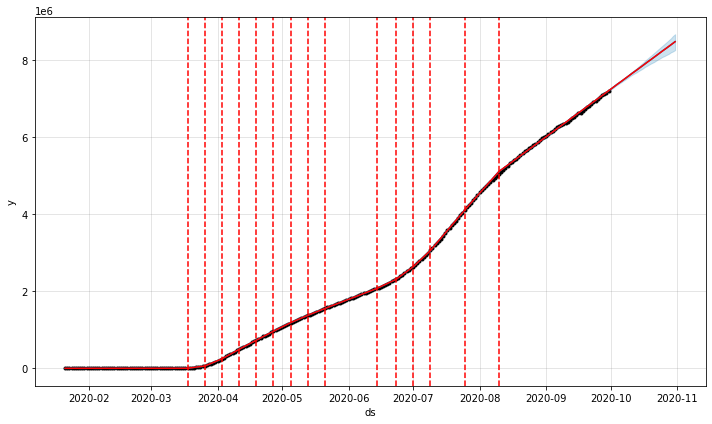

In [62]:
from fbprophet.plot import add_changepoints_to_plot

# This particular feature helps us identify trend changes that are infered by the model

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


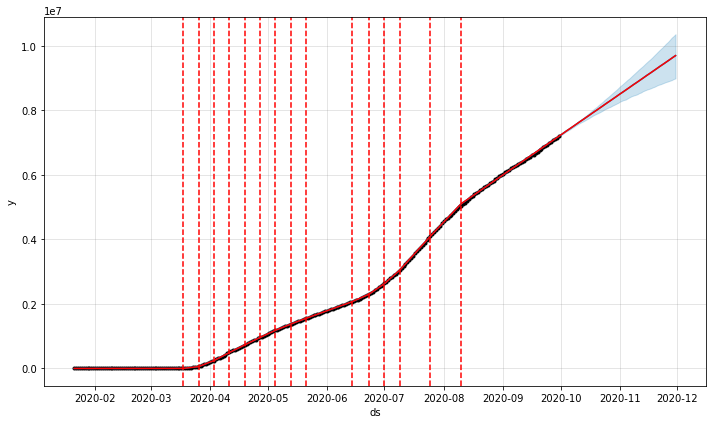

In [63]:
#forecasting for next 61 days
future = m.make_future_dataframe(periods = 61)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# ASSESS THE PERFORMANCE OF THE MODEL

In [68]:
# Access the performance of the model
score = r2_score(test['y'], forecast[forecast['ds'] >= '2020-10-01']['trend'])
print('R-Sqaure score is {}'.format(score))

R-Sqaure score is 0.7804513848008419


In [69]:
# Add the predicted values to the original dataframe for plotting purpose
df_us['predicted'] = forecast['trend']

In [70]:
df_us

,ds,y,predicted
0,2020-01-21,1.0,5.021731e+01
1,2020-01-22,1.0,5.082164e+01
2,2020-01-23,1.0,5.142598e+01
3,2020-01-24,1.0,5.203031e+01
4,2020-01-25,2.0,5.263465e+01
...,...,...,...
280,2020-10-27,8704524.0,8.302851e+06
281,2020-10-28,8779653.0,8.343885e+06
282,2020-10-29,8858024.0,8.384919e+06
283,2020-10-30,8946154.0,8.425952e+06


In [72]:
# Function to plot the forecast and the origianl values for comparison

def interactive_plot_forecasting(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['ds'],y = df[i], name = i)
    fig.show()

In [73]:
interactive_plot_forecasting(df_us, 'Original Vs Predicted')